# Installing Requirements 


In [1]:
!pip install pandas 
!pip install numpy 
!pip install Faker 
!pip install seaborn 
!pip install matplotlib 
!pip install scikit-learn 
!pip install kneed 

zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip


# Data Preparation 
In order to train our model, we need to prepare the data so that it can be used by the model.

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import re 

def split_interests(interests):
  tokens = interests.split(", ")
  interests_list = [] 
    
  for token in tokens:
      interests_list.append(token)
        
  return interests_list

df = pd.read_csv("./dataset.csv") 
training_df = df.copy(); 

## Feature Selection 
Dropping name, surname, gender, searching_gender and age columns since they won't be necessary for the traning. 

In [3]:
training_df = training_df.drop(columns=["name", "surname", "gender", "searching_gender", "age"]) 
training_df.head(5)

,interests,latitude,longitude
0,"Roller hockey, Movies, Gaming, Paragliding, Or...",42.4355,-83.4890
1,"Gardening, Web design, Mathematics, Gaming",39.5204,-81.0684
2,"Table tennis, Judo, Food criticism, Stand-up c...",48.0572,-117.7466
3,"Fishing, Pinball, Rock Climbing, Bar tending, ...",27.7037,-97.5718
4,"Art history, Gymnastics, Rappelling, Advertisi...",38.4810,-100.4663


Then we are gonna transform categorical features into numeric ones using the CountVectorizer class. 

In [4]:
from sklearn.feature_extraction.text import CountVectorizer  

vect = CountVectorizer(tokenizer=lambda interests: split_interests(interests), lowercase=True) 
vect_labels = vect.fit_transform(training_df["interests"]) 

training_df = pd.concat([training_df, pd.DataFrame(data=vect_labels.toarray(), columns=vect.get_feature_names_out())], axis=1)
training_df = training_df.drop(columns=["interests"])

training_df.head(5)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,latitude,longitude,acting,advertising,air hockey,american football,art,art history,astronomy,astrophysics,...,watercolor,web design,weightlifting,windsurfing,wine tasting,woodworking,wrestling,writing,yachting,yoga
0,42.4355,-83.4890,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,39.5204,-81.0684,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,48.0572,-117.7466,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27.7037,-97.5718,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,38.4810,-100.4663,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Feature Scaling
Normalizing our data using minMax normalization 

In [5]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler() 
training_df[training_df.columns] = scaler.fit_transform(training_df[training_df.columns])

training_df.head()

,latitude,longitude,acting,advertising,air hockey,american football,art,art history,astronomy,astrophysics,...,watercolor,web design,weightlifting,windsurfing,wine tasting,woodworking,wrestling,writing,yachting,yoga
0,0.464666,0.833018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.409333,0.855243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.571376,0.518469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.185031,0.703711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.389603,0.677135,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Principal Component Analysis
Principal Component Analysis or PCA is used to reduce the dataset dimensionality and select only the principal components, i.e. those features who carry most of the significative data. 

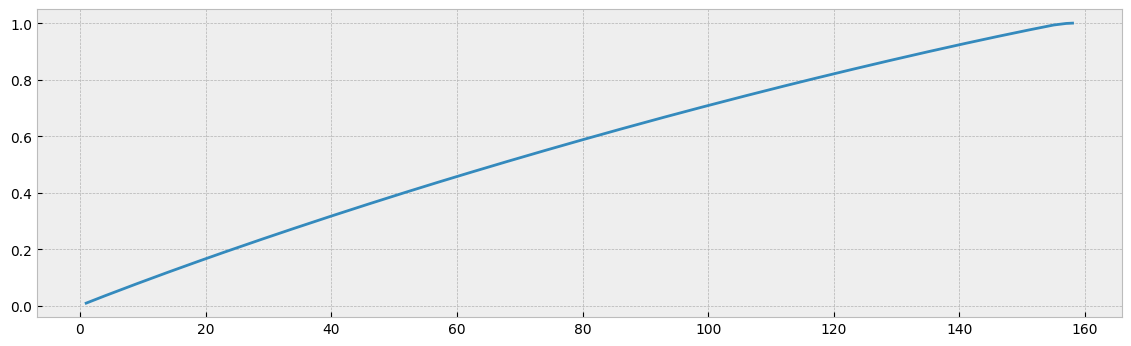

Number features: 154
Total Variance Explained: 0.9933861399213042


In [6]:
from sklearn.decomposition import PCA 

pca = PCA() 

pca_df = pca.fit_transform(training_df) 

# Plotting to determine how many features should the dataset be reduced to 
plt.style.use("bmh")
plt.figure(figsize=(14,4)) 
plt.plot(range(1,training_df.shape[1]+1), pca.explained_variance_ratio_.cumsum())
plt.show()

# Finding the exact number of features that explain at least 99% of the variance in the dataset
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_99 = len(total_explained_variance[total_explained_variance>=.99])
n_to_reach_99 = training_df.shape[1] - n_over_99

print(f"Number features: {n_to_reach_99}\nTotal Variance Explained: {total_explained_variance[n_to_reach_99]}")

In [8]:
# Reducing the dataset to the number of features determined before
pca = PCA(n_components=n_to_reach_99)

# Fitting and transforming the dataset to the stated number of features and creating a new DF
pca_df = pca.fit_transform(training_df)

# Seeing the variance ratio that still remains after the dataset has been reduced
print(pca.explained_variance_ratio_.cumsum()[-1])

0.9890603474159855


# Modeling 

## Agglomerative Clustering 


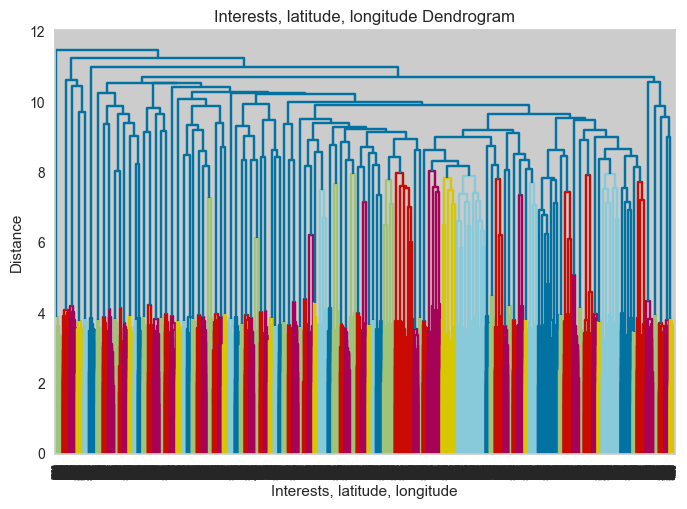

In [9]:
import scipy.cluster.hierarchy as sch 
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

def plot_metrics(cluster_count, scores_to_plot, score_name, start = 0, finish = 0):
  indexes = [i for i in cluster_count]

  if (start > 0 and finish > 0):
    indexes = indexes[start:finish] 
    scores_to_plot = scores_to_plot[start:finish]

  plt.plot(indexes, scores_to_plot)
  plt.xlabel("# cluster")
  plt.ylabel(score_name)
  plt.show()


dendrogram = sch.dendrogram(sch.linkage(training_df, method="ward"))

plt.title("Interests, latitude, longitude Dendrogram")
plt.xlabel("Interests, latitude, longitude")
plt.ylabel("Distance")
plt.show()

In [13]:
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score

cluster_count = range(2, 200)

davies_scores = []
silhouette_scores = []
calinski_harabasz_scores = []

for i in cluster_count:
    hac_model = AgglomerativeClustering(n_clusters = i)
    hac_model.fit(training_df)
    hac_assignments = hac_model.labels_
    davies_scores.append(davies_bouldin_score(training_df, hac_assignments))
    silhouette_scores.append(silhouette_score(training_df, hac_assignments))
    calinski_harabasz_scores.append(calinski_harabasz_score(training_df, hac_assignments))

# PLOTTING DAVIES BOULDIN SCORES
Davies Bouldin index is based on the principle of with-cluster and between cluster distances. It is commonly used for deciding the number of clusters in which the data points should be labeled. It is different from the other two as the value of this index should be small. So the main motive is to decrease the DB index. 

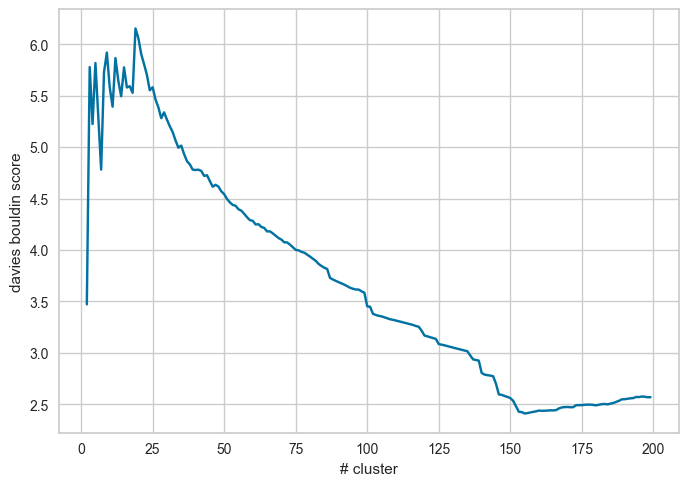

In [11]:
plot_metrics(cluster_count, davies_scores, "davies bouldin score") 

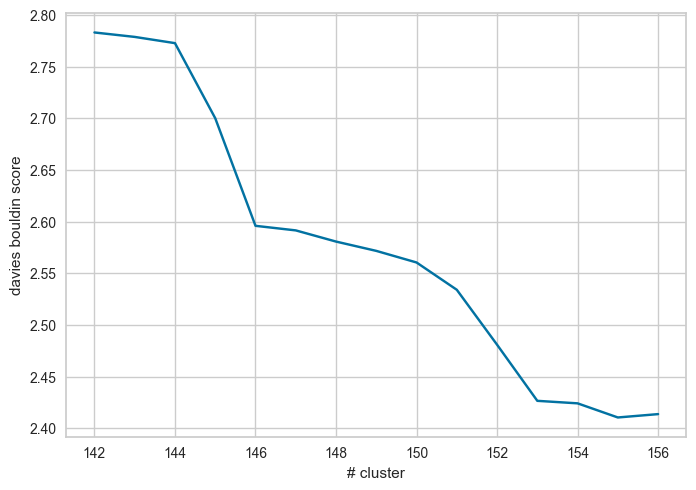

In [12]:
plot_metrics(cluster_count, davies_scores, "davies bouldin score", 140, 155) 

# PLOTTING SILHOUETTE SCORE
Silhouette score returns the average silhouette coefficient applied on all the samples. The Silhouette Coefficient is calculated by using the mean of the distance of the intra-cluster and nearest cluster for all the samples. The Silhouette Coefficient ranges from [-1,1]. The higher the Silhouette Coefficients (the closer to +1), the more is the separation between clusters. If the value is 0 it indicates that the sample is on or very close to the decision boundary between two neighboring clusters whereas a negative value indicates that those samples might have been assigned to the wrong cluster.

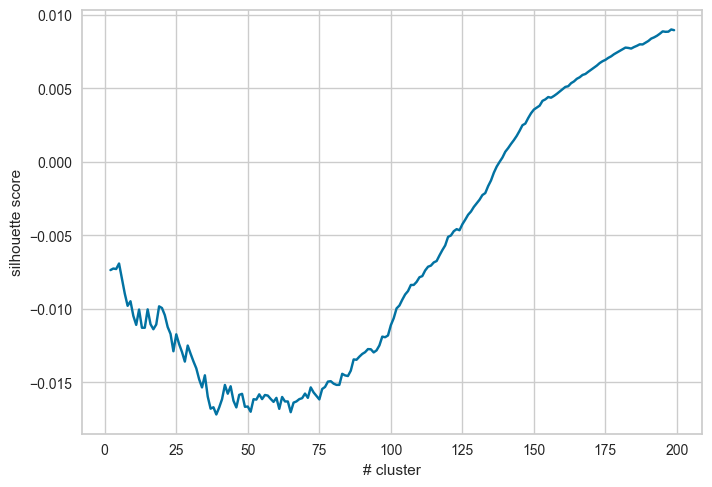

In [15]:
plot_metrics(cluster_count, silhouette_scores, "silhouette score") 

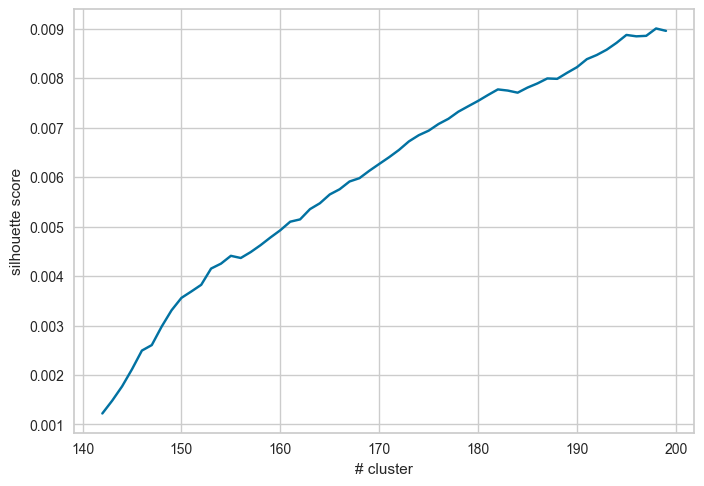

In [18]:
plot_metrics(cluster_count, silhouette_scores, "silhouette score", 140, 200) 

# PLOTTING CALINSKI HARABASZ SCORE
The Calinski Harabaz index is based on the principle of variance ratio. This ratio is calculated between two parameters within-cluster diffusion and between cluster dispersion. The higher the index the better is clustering. 

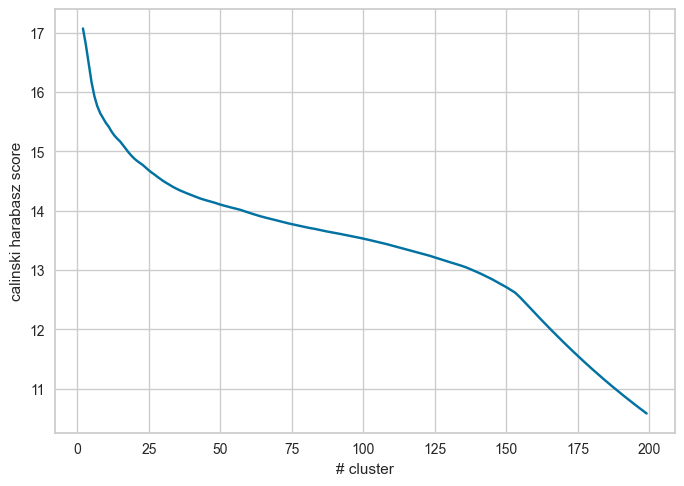

In [14]:
plot_metrics(cluster_count, calinski_harabasz_scores, "calinski harabasz score")

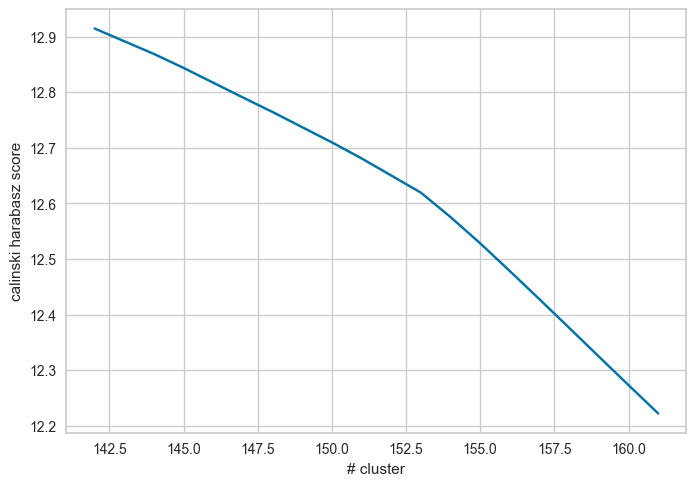

In [15]:
plot_metrics(cluster_count, calinski_harabasz_scores, "calinski harabasz score", 140, 160)

Looking all results, it seems that 154 is the average (155 for davies bouldin, 155 for silhouette score, 153 for calinski harabasz)

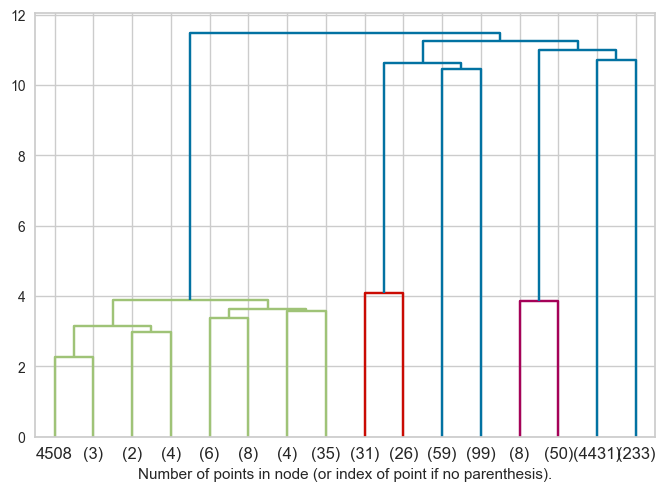

In [16]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

hac_model = AgglomerativeClustering(compute_distances=True, n_clusters = 154)
hac_model.fit(training_df)

plot_dendrogram(hac_model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [18]:
print(f"DB Score: {davies_bouldin_score(training_df, hac_model.labels_)}")
print(f"Silhouette Score: {silhouette_score(training_df, hac_model.labels_)}")
print(f"Calinski Harabasz Score: {calinski_harabasz_score(training_df, hac_model.labels_)}")

DB Score: 2.424067990561999
Silhouette Score: 0.004250730189086839
Calinski Harabasz Score: 12.575345880105381


# Exporting Clustered Dataset

In [19]:
training_df = df[['name', 'surname', 'gender', 'searching_gender', 'age','interests']].join(pd.DataFrame(scaler.inverse_transform(training_df), columns=training_df.columns, index=training_df.index)) 
training_df['Cluster #'] = hac_model.labels_

training_df.head(5)

,name,surname,gender,searching_gender,age,interests,latitude,longitude,acting,advertising,...,web design,weightlifting,windsurfing,wine tasting,woodworking,wrestling,writing,yachting,yoga,Cluster #
0,Beth,Shaw,F,M,23,"Roller hockey, Movies, Gaming, Paragliding, Or...",42.4355,-83.4890,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109
1,Tammy,Gray,N,F,35,"Gardening, Web design, Mathematics, Gaming",39.5204,-81.0684,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,145
2,Casey,Taylor,M,M,31,"Table tennis, Judo, Food criticism, Stand-up c...",48.0572,-117.7466,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88
3,Carrie,Black,F,M,38,"Fishing, Pinball, Rock Climbing, Bar tending, ...",27.7037,-97.5718,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100
4,Stephanie,Martinez,F,F,28,"Art history, Gymnastics, Rappelling, Advertisi...",38.4810,-100.4663,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,149


In [20]:
training_df.to_csv('clustered_dataset.csv', index=False, header=True)